In [141]:
from __future__ import division
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from scipy.stats import chisquare, ttest_ind
%matplotlib inline

In [11]:
df = pd.read_csv("data/ffclean6.csv", encoding='utf-8')
df.head()

,code,creator,created_datetime,last_modified_datetime,product_name,quantity,packaging,brands,categories_en,countries_en,...,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,27533024.0,tacinte,2014-12-16T12:29:19Z,2015-09-22T09:32:26Z,Luxury Christmas Pudding,454g,"plastic,bowl","Asda,Asda Extra Special","Desserts,Puddings,Biscuits-et-gateaux,Gateaux,...",United Kingdom,...,7.0,3.6,54.2,44.0,4.7,3.9,0.200000,0.07874,10,10
1,27533048.0,tacinte,2014-12-16T12:28:35Z,2015-08-09T17:35:41Z,Luxury Christmas Pudding,907g,"plastic,bowl","Asda,Asda Extra Special","Sugary snacks,Desserts,Biscuits and cakes,Cake...",United Kingdom,...,7.0,3.6,54.2,44.0,4.7,3.9,0.199898,0.07870,10,10
2,40608754.0,andre,2012-08-15T09:48:28Z,2015-08-09T17:35:31Z,"Pepsi, Nouveau goût !",15 cl,Canette aluminium,Pepsi,"Beverages,Carbonated drinks,Sodas,Colas,Sugare...",France,...,0.0,0.0,10.4,10.4,0.0,0.0,0.025400,0.01000,13,2
3,87177756.0,tacite,2015-06-06T10:28:06Z,2015-06-06T11:13:26Z,7Up,33 cl,Canette,"7Up,Pepsico","Beverages,Plant-based beverages,Carbonated dri...",France,...,0.0,0.0,10.4,10.4,NaN,0.0,0.100000,0.03937,13,2
4,790310013.0,malikele,2014-01-02T17:03:07Z,2015-11-04T15:08:31Z,Sour Fruit Gummies,3.5 oz,NaN,Candy Crush,"Sugary snacks,Confectioneries,Candies",Germany,...,0.0,0.0,75.0,57.5,0.0,5.0,0.127000,0.05000,14,14


In [12]:
df.columns

Index([u'code', u'creator', u'created_datetime', u'last_modified_datetime',
       u'product_name', u'quantity', u'packaging', u'brands', u'categories_en',
       u'countries_en', u'additives_n',
       u'ingredients_that_may_be_from_palm_oil_n', u'pnns_groups_1',
       u'pnns_groups_2', u'states_en', u'main_category_en', u'energy_100g',
       u'fat_100g', u'saturated_fat_100g', u'carbohydrates_100g',
       u'sugars_100g', u'fiber_100g', u'proteins_100g', u'salt_100g',
       u'sodium_100g', u'nutrition_score_fr_100g', u'nutrition_score_uk_100g'],
      dtype='object')

In [13]:
df.describe()

,code,additives_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,3.114900e+04,29237.000000,29237.000000,31149.000000,31142.000000,31149.000000,31137.000000,31149.000000,21352.000000,31149.000000,31149.000000,31149.000000,31149.000000,31149.000000
mean,2.921483e+17,2.020864,0.156104,1086.702674,12.944264,5.159998,27.988388,12.698267,2.776973,7.364695,0.986919,0.388554,7.981637,7.719092
std,5.156076e+19,2.608891,0.468079,782.843014,16.800550,7.905305,27.365341,18.007295,3.918956,7.287275,3.656017,1.439429,9.110447,9.507575
min,1.040000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,0.000000,0.000000,-14.000000,-14.000000
25%,3.210179e+12,0.000000,0.000000,381.000000,1.100000,0.208000,4.500000,1.100000,0.500000,1.900000,0.080000,0.031496,1.000000,0.000000
50%,3.329490e+12,1.000000,0.000000,990.000000,6.000000,1.800000,14.600000,4.000000,1.800000,5.800000,0.510000,0.200787,7.000000,5.000000
75%,4.025500e+12,3.000000,0.000000,1651.000000,21.000000,7.000000,54.000000,15.900000,3.500000,10.000000,1.200000,0.472441,15.000000,16.000000
max,9.100000e+21,21.000000,6.000000,4134.000000,101.000000,100.000000,106.000000,104.000000,86.200000,86.000000,254.000000,100.000000,35.000000,33.000000


In [18]:
np.unique(df['countries_en'])

array([nan, u'Albania,Denmark,Italy', u'Albania,Italy',
       u'Algeria,Belgium,Canada,France,Morocco,Switzerland',
       u'Algeria,Egypt,Morocco,Qatar,Tunisia,United Arab Emirates',
       u'Algeria,France', u'Andorra,France', u'Argentina', u'Aruba',
       u'Australia', u'Australia,Belgium,France',
       u'Australia,Czech Republic,France', u'Australia,France',
       u'Australia,Germany,Netherlands',
       u'Australia,Indonesia,United States', u'Australia,New Zealand',
       u'Australia,New Zealand,Singapore,Thailand',
       u'Australia,Thailand,United Kingdom',
       u'Australia,United Kingdom,United States',
       u'Australia,United States', u'Austria',
       u'Austria,France,Germany,Italy,Switzerland', u'Austria,Germany',
       u'Austria,Germany,Spain', u'Belgium', u'Belgium,Denmark',
       u'Belgium,Denmark,France,Germany', u'Belgium,France',
       u'Belgium,France,Germany',
       u'Belgium,France,Germany,Ireland,Netherlands,Portugal,Spain,United Kingdom',
       u'B

In [33]:
def contains_country(data, country='France'):
    data = [word.strip() for word in data.split(',')]
    return (country in data)

In [34]:
df['is_french'] = df['countries_en'].dropna().apply(contains_country)
df['is_french'].head()

0    False
1    False
2     True
3     True
4    False
Name: is_french, dtype: object

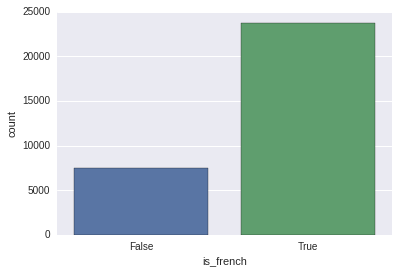

In [35]:
sns.countplot(x='is_french', data=df)

----

In [136]:
df.to_csv('data/ffclean6_isfrench.csv', encoding='utf-8')

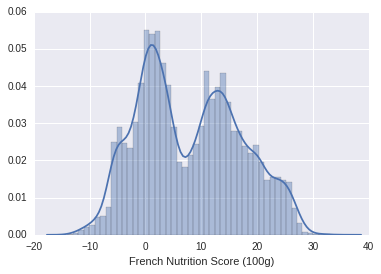

In [147]:
ax = sns.distplot(df['nutrition_score_fr_100g'])
ax.set(xlabel='French Nutrition Score (100g)')
pyplot.show()

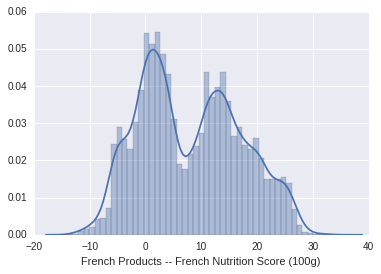

In [148]:
ax = sns.distplot(df['nutrition_score_fr_100g'][df['is_french'] == 1])
ax.set(xlabel='French Products -- French Nutrition Score (100g)')
pyplot.show()

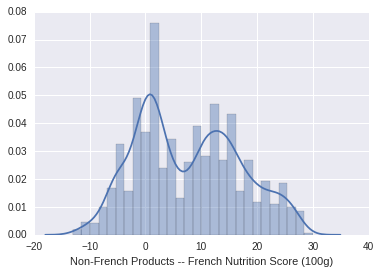

In [151]:
ax = sns.distplot(df['nutrition_score_fr_100g'][df['is_french'] == 0])
ax.set(xlabel='Non-French Products -- French Nutrition Score (100g)')
pyplot.show()

### Is there a difference in the Distributions

In [85]:
non_french = df['nutrition_score_fr_100g'][df['is_french'] == 0].values.reshape(-1, 1)
french = df['nutrition_score_fr_100g'][df['is_french'] == 1].values.reshape(1, -1)
french

array([[13, 13, 13, ...,  4, -4,  2]])

In [112]:
from collections import Counter

In [127]:
french_dist = sorted(Counter(np.ravel(french)).most_common(), key=lambda key_value: key_value[0])
french_dist = filter(lambda d: d[1] > 5, french_dist)
french_dist

[(-13, 6),
 (-12, 22),
 (-11, 38),
 (-10, 49),
 (-9, 97),
 (-8, 102),
 (-7, 167),
 (-6, 567),
 (-5, 670),
 (-4, 596),
 (-3, 534),
 (-2, 705),
 (-1, 903),
 (0, 1258),
 (1, 1191),
 (2, 1263),
 (3, 1130),
 (4, 1002),
 (5, 721),
 (6, 444),
 (7, 408),
 (8, 507),
 (9, 556),
 (10, 636),
 (11, 1018),
 (12, 860),
 (13, 922),
 (14, 1016),
 (15, 832),
 (16, 618),
 (17, 671),
 (18, 559),
 (19, 537),
 (20, 605),
 (21, 476),
 (22, 348),
 (23, 348),
 (24, 347),
 (25, 360),
 (26, 322),
 (27, 158),
 (28, 63),
 (29, 17),
 (30, 11),
 (31, 6),
 (32, 7)]

In [130]:
non_french_dist = sorted(Counter(np.ravel(non_french)).most_common(), key=lambda key_value: key_value[0])
non_french_dist = filter(lambda d: d[1] > 5, non_french_dist)
non_french_dist

[(-13, 7),
 (-12, 14),
 (-11, 26),
 (-10, 28),
 (-9, 47),
 (-8, 50),
 (-7, 64),
 (-6, 192),
 (-5, 212),
 (-4, 160),
 (-3, 179),
 (-2, 218),
 (-1, 341),
 (0, 420),
 (1, 460),
 (2, 407),
 (3, 275),
 (4, 228),
 (5, 164),
 (6, 149),
 (7, 147),
 (8, 150),
 (9, 191),
 (10, 253),
 (11, 324),
 (12, 250),
 (13, 286),
 (14, 307),
 (15, 259),
 (16, 234),
 (17, 179),
 (18, 173),
 (19, 135),
 (20, 134),
 (21, 122),
 (22, 100),
 (23, 126),
 (24, 126),
 (25, 88),
 (26, 112),
 (27, 66),
 (28, 33),
 (29, 6)]

In [132]:
y1 = [v for k, v in non_french_dist]
y2 = [v for k, v in french_dist]

([7,
  14,
  26,
  28,
  47,
  50,
  64,
  192,
  212,
  160,
  179,
  218,
  341,
  420,
  460,
  407,
  275,
  228,
  164,
  149,
  147,
  150,
  191,
  253,
  324,
  250,
  286,
  307,
  259,
  234,
  179,
  173,
  135,
  134,
  122,
  100,
  126,
  126,
  88,
  112,
  66,
  33,
  6],
 [6,
  22,
  38,
  49,
  97,
  102,
  167,
  567,
  670,
  596,
  534,
  705,
  903,
  1258,
  1191,
  1263,
  1130,
  1002,
  721,
  444,
  408,
  507,
  556,
  636,
  1018,
  860,
  922,
  1016,
  832,
  618,
  671,
  559,
  537,
  605,
  476,
  348,
  348,
  347,
  360,
  322,
  158,
  63,
  17,
  11,
  6,
  7])

In [156]:
y2_normed = [d / 3 for d in y2]

In [157]:
chisquare(f_obs=y1, f_exp=y2_normed[:-3], axis=None)

Power_divergenceResult(statistic=267.67459887915032, pvalue=1.2309892753521193e-34)

In [143]:
ttest_ind(y1, y2, equal_var=False)

Ttest_indResult(statistic=-5.8939882287356298, pvalue=2.5507791577881962e-07)

In [158]:
df['nutrition_score_fr_100g'][df['is_french'] == 0].mean()

7.692865779927448

In [159]:
df['nutrition_score_fr_100g'][df['is_french'] == 1].mean()

8.069256756756756

* There is a bias twoards French products being rated higher